In [29]:
! pip install mplfinance

In [30]:
import os
from urllib import request
import pandas as pd

def get_bb_log(yyyy, mm, dd, symbol="BTCUSD"):
    '''
    bybitからパラメーターに指定された日付の約定データを/tmpにダウンロードする。
    /tmpに一時保存することでキャッシュ機能を実現
    :param yyyy: 年（４桁）
    :param mm: 月
    :param dd: 日
    :param symbol: オプション：ディフォルトBTCUSD
    :return: /tmpにダウンロードしたファイル名
    '''
    file_name = f'{symbol}{yyyy:04d}-{mm:02d}-{dd:02d}.csv.gz'
    tmp_file = '/tmp/'+ file_name

    if not os.path.exists(tmp_file):
        download_url = f'https://public.bybit.com/trading/{symbol}/{file_name}'
        request.urlretrieve(download_url, tmp_file)
        print("download file=", file_name)

    return tmp_file

def get_bb_df(yyyy, mm, dd):
    '''
    bybitから約定データをダウンロードしpandasのDataFrameオブジェクトにする。
    :param yyyy: 年（４桁）
    :param mm: 月
    :param dd: 日
    :return: 約定データが入ったDataFrame
    '''
    file = get_bb_log(yyyy, mm, dd)

    bb_df = pd.read_csv(file, index_col=0)
    bb_df.index = pd.to_datetime(bb_df.index*1_000_000_000, utc=True)

    return bb_df


def resample_ohlcv(data, sample_time):
    '''
    約定データからohlcvを作成する。
    timeに指定できるパラメータは文字列で以下のように指定する。
    15秒:'15S' / 1分: '1T' / 1時間: '1H'
    詳細はpadnasのドキュメント
    https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
    :param data:　bybitの約定データの入ったDataFrame
    :param sample_time: サンプル間隔
    :return: ohlcvデータ
    '''
    resample_df = data['price'].resample(sample_time).ohlc()
    resample_df['volume'] = data['size'].resample(sample_time).sum()
    return resample_df

In [31]:

df = get_bb_df(2021, 9, 15)
df = df.append(get_bb_df(2021, 9, 16))
df = df.append(get_bb_df(2021, 9, 17))


## 15秒足の表示

注：15秒足,1分足だとデータが多すぎてwarningが出る。時間足ではwarningが出ない。
データ量とあわせてサンプル間隔を決める必要がある。


In [32]:
import mplfinance as mpf

# 15秒足作成
ohlcv_df = resample_ohlcv(df, '15S')

ohlcv_df.head()

,open,high,low,close,volume
timestamp,,,,,
2021-09-15 00:00:00+00:00,47109.5,47109.5,47081.0,47081.5,2813964
2021-09-15 00:00:15+00:00,47081.0,47081.5,47073.0,47073.0,883971
2021-09-15 00:00:30+00:00,47073.0,47079.0,47064.0,47079.0,1157555
2021-09-15 00:00:45+00:00,47079.0,47079.0,47078.5,47078.5,189397
2021-09-15 00:01:00+00:00,47078.5,47080.0,47078.5,47079.5,783229


/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


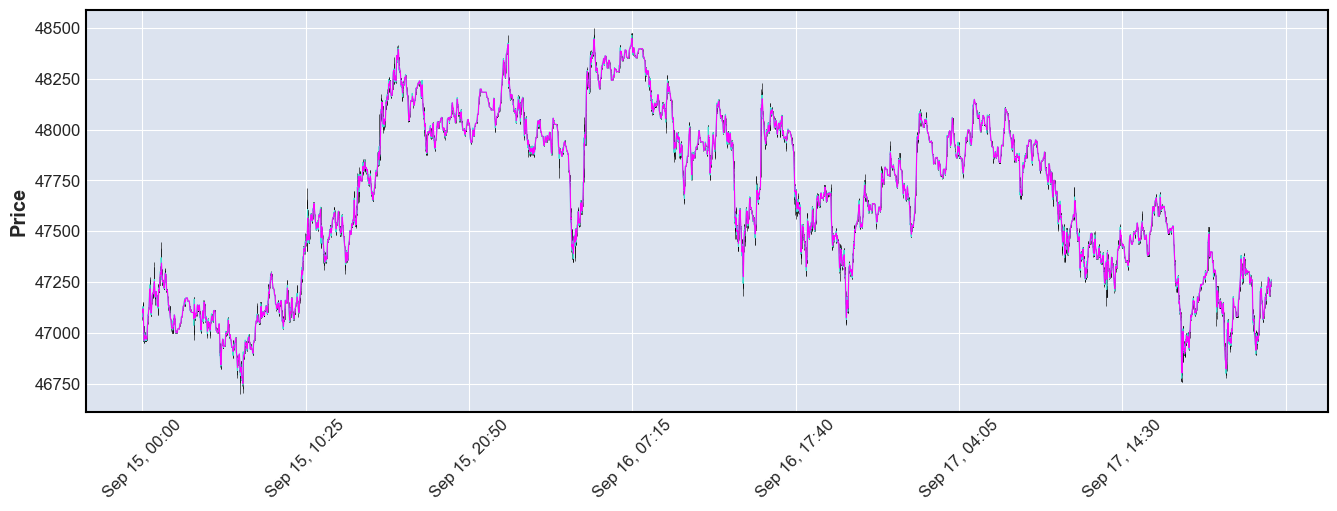

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


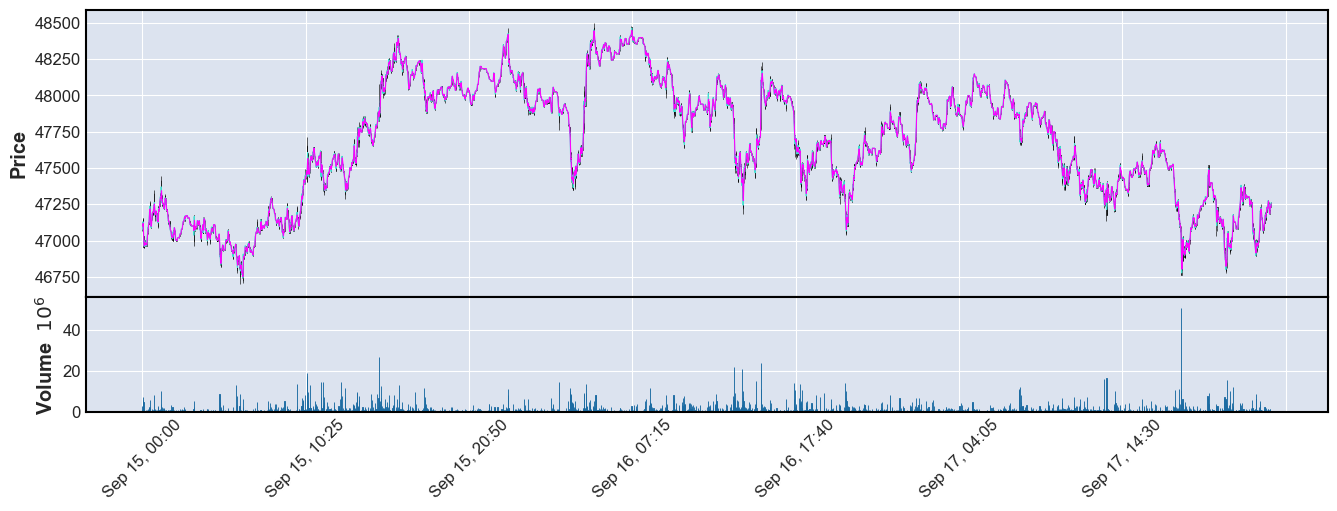

In [33]:
# ohlcのグラフ化
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10))

# ohlcvのグラフ化
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10), volume=True)


## 1分足の表示



In [34]:
# 1分足作成

ohlcv_df = resample_ohlcv(df, '1T')
ohlcv_df.head()

,open,high,low,close,volume
timestamp,,,,,
2021-09-15 00:00:00+00:00,47109.5,47109.5,47064.0,47078.5,5044887
2021-09-15 00:01:00+00:00,47078.5,47153.5,47078.5,47153.5,8892651
2021-09-15 00:02:00+00:00,47153.0,47153.5,47070.0,47142.5,15872419
2021-09-15 00:03:00+00:00,47142.5,47143.0,47078.5,47079.0,2560040
2021-09-15 00:04:00+00:00,47078.5,47079.0,47033.5,47033.5,2353220


/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


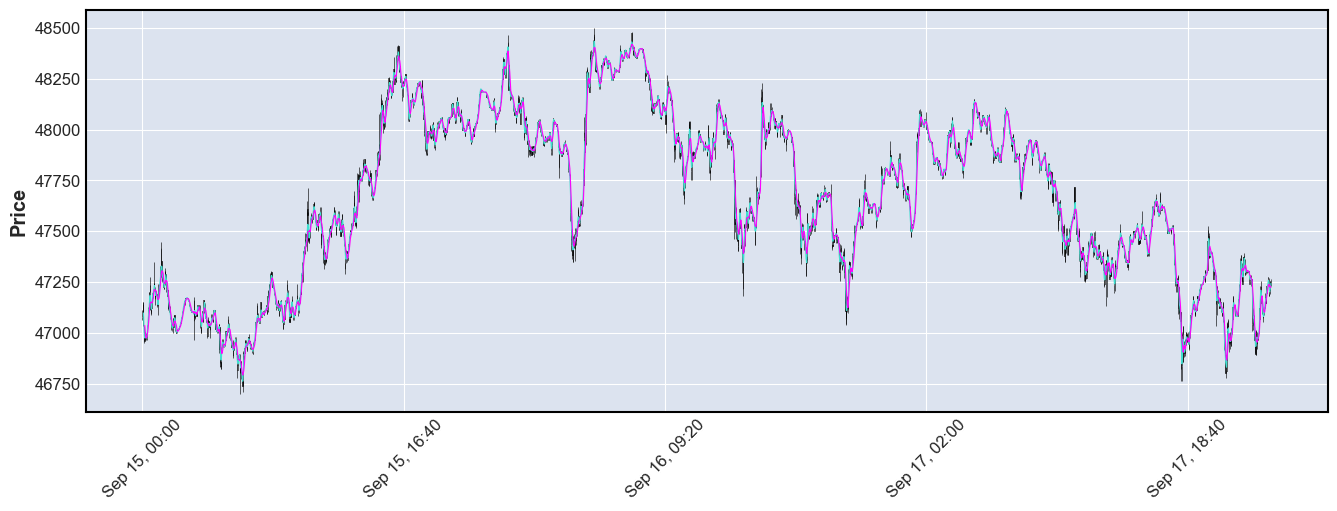

/Users/takeoyasukawa/Projects/bbanalyze/venv/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


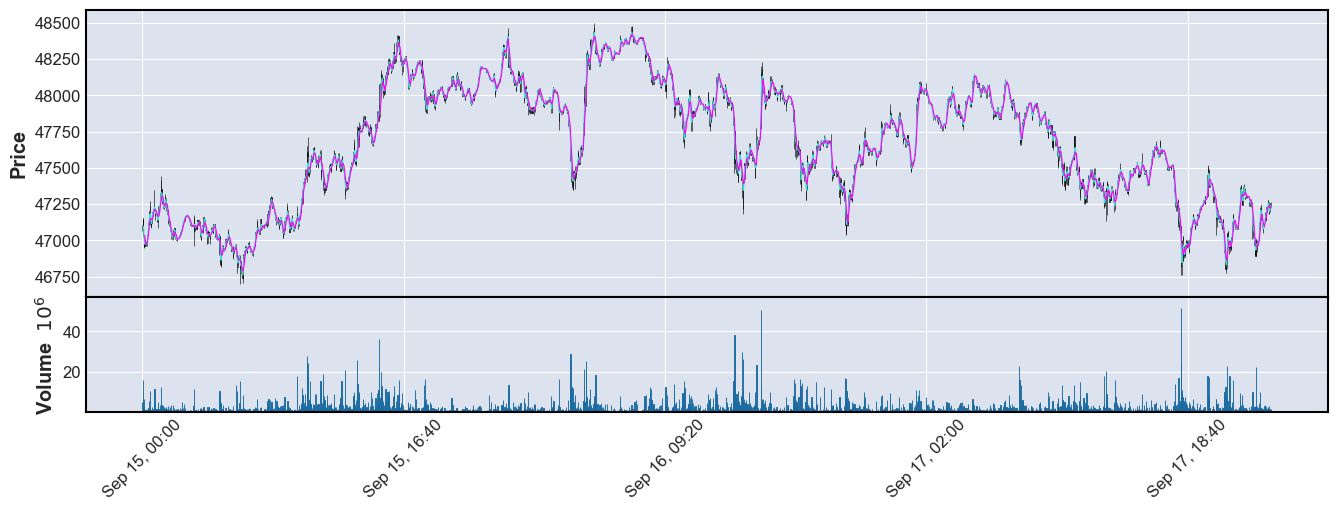

In [35]:
# ohlcのグラフ化
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10))

# ohlcvのグラフ化
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10), volume=True)




## 1時間足の表示

In [39]:
# 1時間足作成
ohlcv_df = resample_ohlcv(df, '1H')

ohlcv_df.head()

,open,high,low,close,volume
timestamp,,,,,
2021-09-15 00:00:00+00:00,47109.5,47350.0,46951.0,47137.0,130713843
2021-09-15 01:00:00+00:00,47137.5,47445.0,47000.0,47044.5,105234309
2021-09-15 02:00:00+00:00,47045.0,47172.0,46999.0,47156.5,47737913
2021-09-15 03:00:00+00:00,47157.0,47177.0,46963.0,47072.0,60636334
2021-09-15 04:00:00+00:00,47072.0,47110.0,46832.0,46856.0,74501893


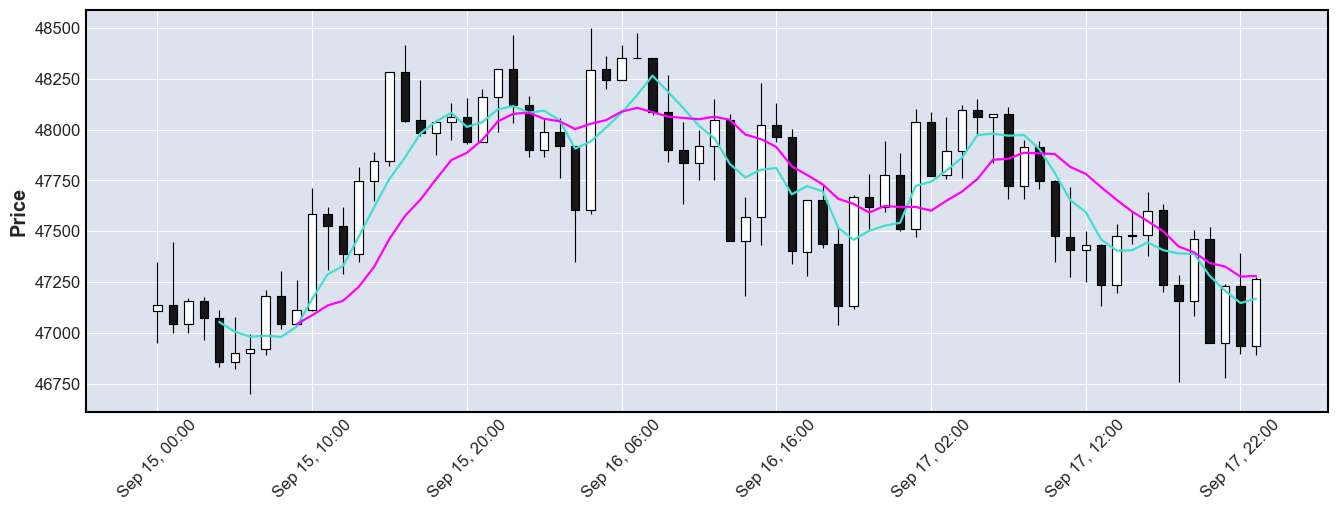

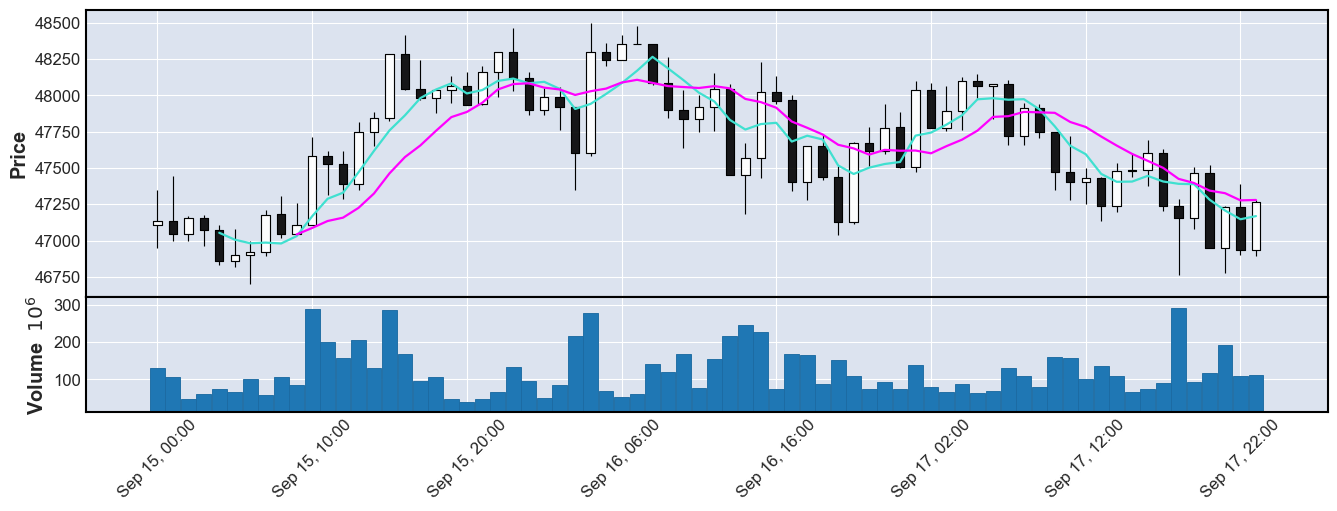

In [37]:
# ohlcのグラフ化
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10))

# ohlcvのグラフ化
mpf.plot(ohlcv_df, type='candle', figratio=(12,4), mav=(5, 10), volume=True)